# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('summer.csv')

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# 1. In how many cities Summer Olympics is held so far?

In [4]:
df.City.unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [5]:
df.City.nunique()

22

# 2. Which sport is having most number of Gold Medals so far? (Top 5)

<ipython-input-6-afc524f24a4b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=90, labels = a['Sport'].unique()) # Rotations of labels of x-aix


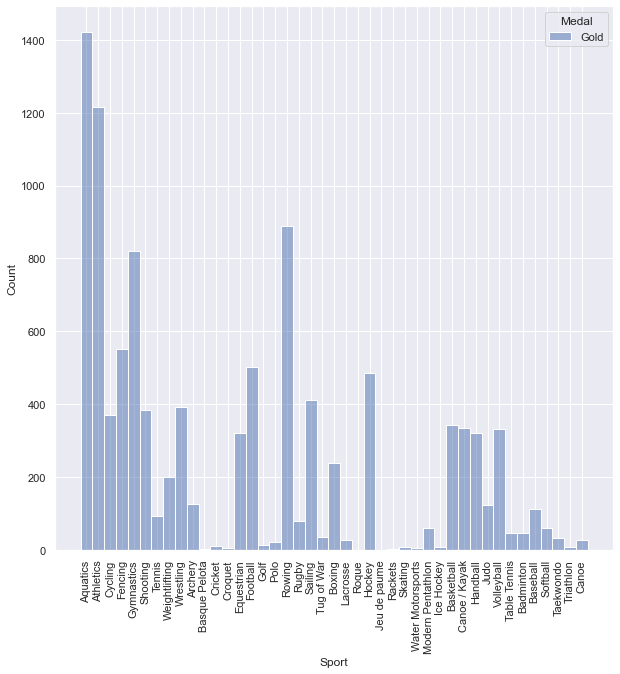

In [6]:
a = df[df["Medal"]=='Gold'] # dataframe with only Gold medals

sns.set(rc={'figure.figsize':(10,10)}) # Defining size of plot

g = sns.histplot(data = a, x = 'Sport', hue = 'Medal') # Histogram
g.set_xticklabels(rotation=90, labels = a['Sport'].unique()) # Rotations of labels of x-aix
plt.show()

In [7]:
# b is the dataframe with count of gold medals for each sport
b = a.groupby(by = ['Sport', 'Medal'])['Medal'].count() 

In [8]:
# Let's now look at 5 sports with highest number of gold medals
b.nlargest()

Sport       Medal
Aquatics    Gold     1421
Athletics   Gold     1215
Rowing      Gold      890
Gymnastics  Gold      820
Fencing     Gold      552
Name: Medal, dtype: int64

# 3. Which sport is having most number of medals so far? (Top 5)

<ipython-input-9-bba0d4a9515b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(rotation=90, labels = df['Sport'].unique()) # Rotations of labels of x-aix


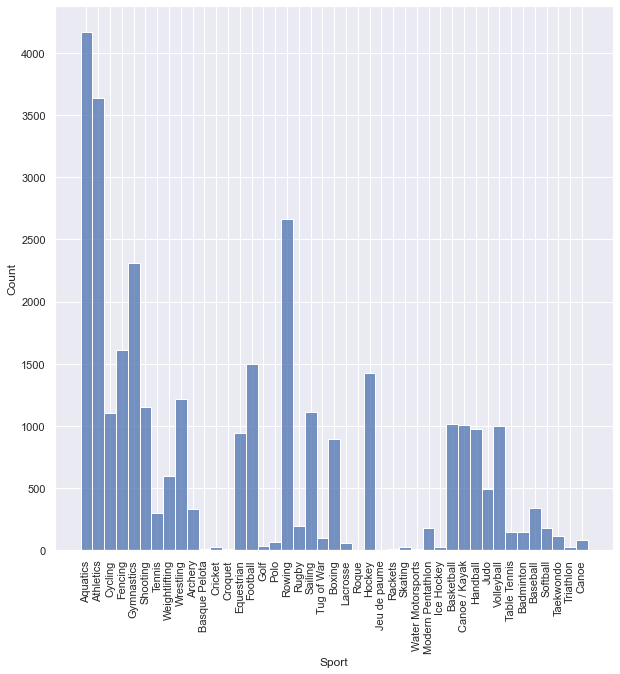

In [9]:
sns.set(rc={'figure.figsize':(10,10)}) # Defining size of plot

g = sns.histplot(data = df, x = 'Sport') # Histogram
g.set_xticklabels(rotation=90, labels = df['Sport'].unique()) # Rotations of labels of x-aix
plt.show()

In [10]:
z = df.groupby(by = ['Sport'])['Medal'].count() 
z.nlargest(5)

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

# 4. Which player has won most number of medals? (Top 5)

In [11]:
z = df.groupby(by = ['Athlete'])['Medal'].count() 
z.nlargest(5)

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

# 5. Which player has won most number Gold Medals of medals? (Top 5)

In [12]:
a = df[df["Medal"]=='Gold'] # dataframe with only Gold medals
z = a.groupby(by = ['Athlete', 'Medal'])['Medal'].count() 
z.nlargest(5)

Athlete           Medal
PHELPS, Michael   Gold     18
LATYNINA, Larisa  Gold      9
LEWIS, Carl       Gold      9
NURMI, Paavo      Gold      9
SPITZ, Mark       Gold      9
Name: Medal, dtype: int64

# 6. In which year India won first Gold Medal in Summer Olympics?

In [13]:
a = df[df["Country"]=='IND']
a = a[a["Medal"]=='Gold']
a=a.sort_values(by='Year', ascending=True)
a.head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


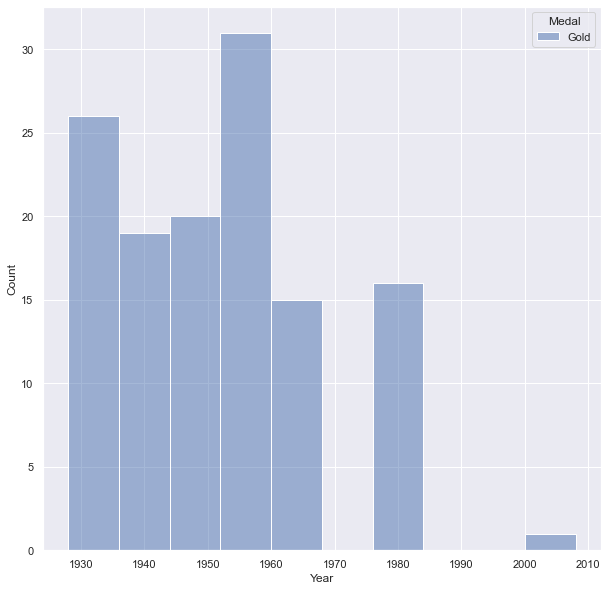

In [14]:

sns.set(rc={'figure.figsize':(10,10)}) # Defining size of plot

g = sns.histplot(data = a, x = 'Year', hue = 'Medal') # Histogram
plt.show()

# 7. Which event is most popular in terms on number of players? (Top 5)

In [15]:
b = df.groupby(by = ['Sport'])['Athlete'].count() 
b.nlargest()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Athlete, dtype: int64

In [16]:
b=b.to_frame()
k = b.reset_index()

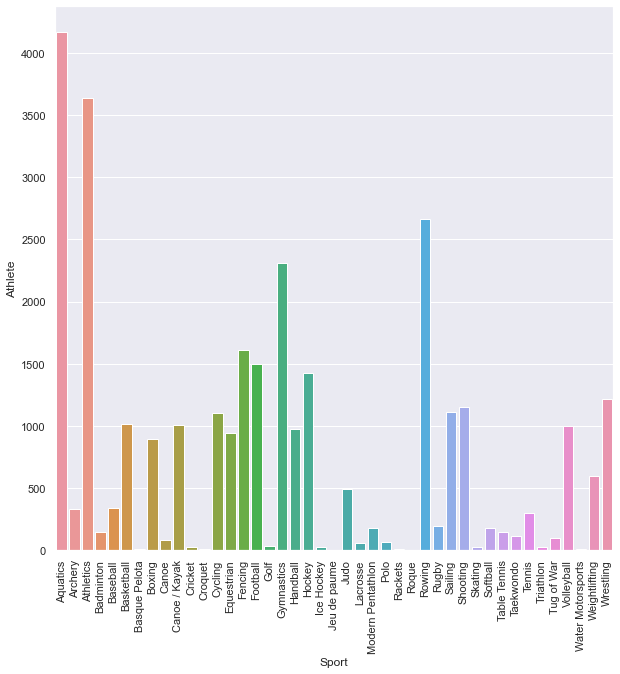

In [17]:
g = sns.barplot(data = k, x ='Sport', y = 'Athlete') # Histogram
g.set_xticklabels(rotation=90, labels = k['Sport'].unique()) # Rotations of labels of x-aix
plt.show()

# 8. Which sport is having most female Gold Medalists? (Top 5)

In [18]:
a = df[df["Gender"]=='Women']
a = a[a['Medal']=="Gold"]
b = a.groupby(by = ['Sport'])['Medal'].count()
b.nlargest()

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64

In [19]:
b=b.to_frame()
k = b.reset_index()

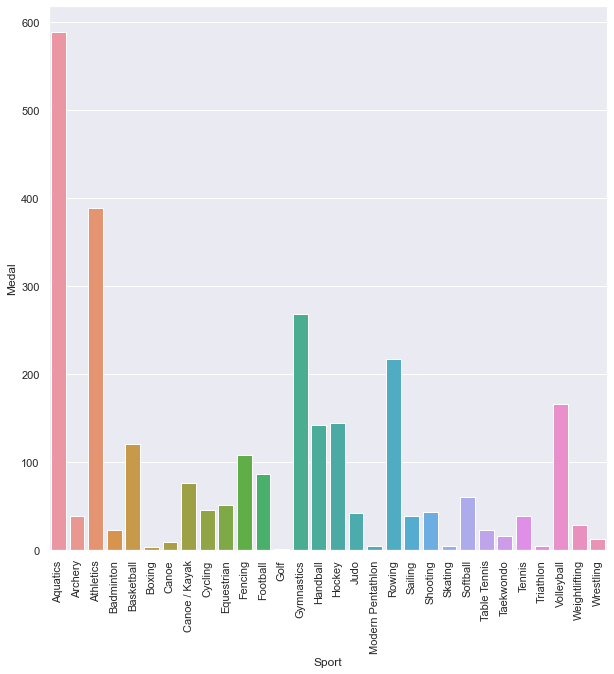

In [20]:
g = sns.barplot(data = k, x ='Sport', y = 'Medal') # Histogram
g.set_xticklabels(rotation=90, labels = k['Sport'].unique()) # Rotations of labels of x-aix
plt.show()